<a href="https://colab.research.google.com/github/sandeep0412/Data-Imputation-on-Psychology-Data/blob/master/CS536_VAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!pip3 install PTable
# Load the Drive helper and mount
from google.colab import drive
# This will prompt for authorization.
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import collections
from collections import defaultdict
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
%matplotlib inline
import scipy.stats as stats
import sklearn
from prettytable import PrettyTable
from keras.layers import Activation
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects

import random
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

from keras.objectives import mse
from keras.models import Sequential
from keras.layers.core import Dense
from keras.regularizers import l1_l2
from keras import backend as k

from collections import defaultdict




Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Using TensorFlow backend.


In [0]:
!ls "/content/drive/My Drive/CS536/csvfiles"

complete_encoded1_cat.csv  data_cat.csv     data_date.csv     data_nlp.csv
complete_encoded1.csv	   datac.csv	    data_date.gsheet  data_nlp_f1.csv
data_1val.csv		   datac_prev1.csv  data_menc.csv     data_num.csv


In [0]:
data_num=pd.read_csv("/content/drive/My Drive/CS536/csvfiles/data_num.csv",encoding='unicode_escape')
data_cat=pd.read_csv("/content/drive/My Drive/CS536/csvfiles/data_cat.csv",encoding='unicode_escape')
data_date=pd.read_csv("/content/drive/My Drive/CS536/csvfiles/data_date.csv",encoding='unicode_escape')
data_nlp = pd.read_csv("/content/drive/My Drive/CS536/csvfiles/data_nlp_f1.csv",encoding='unicode_escape') 

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (172,188) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
data_num = data_num.drop(['previous_session_id'], axis=1)

In [0]:
class LabelEncoderByCol(BaseEstimator, TransformerMixin):
    def __init__(self,col):
        self.col = col.columns.values
        self.label_dic = {}
        for i in self.col:
            self.label_dic[i] = LabelEncoder()

    def fit(self,x,y=None):
        x = x.fillna('NaN')
        for i in self.col:
            a = x[i][x[i]!='NaN']
            self.label_dic[i].fit(a)
        return self

    def transform(self,x,y=None):
        x[self.col] = x[self.col].fillna('NaN')
        for i in self.col:
            a = x[i][x[i]!='NaN']
            b = x[i].get_values()
            b[b!='NaN'] = self.label_dic[i].transform(a)
            x[i]=b
        return x


lenc = LabelEncoderByCol(data_cat)
lenc.fit(x=data_cat,y=None)
#lenc.fit(x=col,y=None).le_dic['customer_class'].classes_
lenc.transform(x=data_cat,y=None)

/usr/local/lib/python3.6/dist-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


,referrer,expgender,flagGroup,exprunafter,compensation,recruitment,separatedornot,sample,sunkgroup,gainlossgroup,...,moneygenderb,nativelang,nativelang2,noflagtimeestimate1,noflagtimeestimate2,noflagtimeestimate3,noflagtimeestimate4,omdimc3,race,task_url.1
0,0,1,2,1,0,5,0,0,0,1,...,1,2,NaN,1,2,0,1,0,15,0
1,1,1,1,1,1,5,1,1,0,1,...,NaN,7,NaN,NaN,NaN,NaN,NaN,1,17,6
2,1,1,1,1,1,5,1,1,1,0,...,1,7,NaN,NaN,NaN,NaN,NaN,1,16,6
3,1,1,1,1,1,5,1,1,0,1,...,NaN,7,NaN,NaN,NaN,NaN,NaN,1,16,6
4,1,1,1,1,1,5,1,1,0,1,...,0,7,NaN,NaN,NaN,NaN,NaN,1,19,6
5,1,1,2,1,1,5,1,1,1,0,...,1,7,NaN,0,1,0,2,1,17,6
6,1,1,1,1,1,5,1,1,1,1,...,NaN,7,NaN,NaN,NaN,NaN,NaN,1,19,6
7,1,1,1,1,1,5,1,1,1,0,...,NaN,7,NaN,NaN,NaN,NaN,NaN,1,19,6
8,1,1,2,1,1,5,1,1,0,0,...,0,7,NaN,NaN,0,2,2,1,19,6
9,1,1,2,1,1,5,1,1,1,0,...,0,7,NaN,0,2,0,2,1,17,6


In [0]:
#Numerical Values
def standardize_col(col):
    return (col - col.min()) * 1.0 / (col.max() - col.min())

for col in data_num.columns:
    data_num[col] = standardize_col(data_num[col])

In [0]:
data_date['session_date'] = pd.to_datetime(data_date['session_date']).astype('int64')
max_a = data_date['session_date'].max()
min_a = data_date['session_date'].min()
min_norm = -1
max_norm =1
data_date['session_date'] = (data_date['session_date'] - min_a) *(max_norm - min_norm) / (max_a-min_a) + min_norm

In [0]:
data_final = data_cat.copy()
for i in data_num.columns:
    data_final[i] = data_num[i]
data_final['session_date'] = data_date['session_date']
data_final.shape

(6344, 339)

In [0]:
#To count columns with full data
count = 0
full_cols =[]
for i in data_num.columns:
    if data_num[i].isnull().sum() == 0:
        count += 1
        full_cols.append(i)
count
print(full_cols)
print(len(data_num.columns))

[]
56


In [0]:
def make_reconstruction_loss(n_features):
    def reconstruction_loss(input_and_mask, y_pred):
        X_values = input_and_mask[:, :n_features]
        #X_values.name = "X_values1"

        missing_mask = input_and_mask[:, n_features:]
        #missing_mask.name = "missing_mask1"
        observed_mask = 1 - missing_mask
        #observed_mask.name = "observed_mask1"

        X_values_observed = X_values * observed_mask
        #X_values_observed.name = "X_values_observed1"

        pred_observed = y_pred * observed_mask
        #pred_observed.name = "y_pred_observed1"

        return mse(y_true=X_values_observed, y_pred=pred_observed)
    return reconstruction_loss


def masked_mae(X_true, X_pred, mask):
    masked_diff = X_true[mask] - X_pred[mask]
    print(masked_diff)
    return np.mean(np.abs(masked_diff))



In [0]:
class AdamOptimizer:
    def __init__(self, weights, alpha=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.alpha = alpha
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m = 0
        self.v = 0
        self.t = 0
        self.theta = weights

    def backward_pass(self, gradient):
        self.t = self.t + 1
        self.m = self.beta1*self.m + (1 - self.beta1)*gradient
        self.v = self.beta2*self.v + (1 - self.beta2)*(gradient**2)
        m_hat = self.m/(1 - self.beta1**self.t)
        v_hat = self.v/(1 - self.beta2**self.t)
        self.theta = self.theta - self.alpha*(m_hat/(np.sqrt(v_hat) - self.epsilon))
        return self.theta

In [0]:
get_custom_objects().update({'custom_relu': Activation(custom_relu)})

In [0]:
class Autoencoder:

    def __init__(self, data,
                 recurrent_weight=0.5,
                 #optimizer="adam",
                 dropout_probability=0.5,
                 #hidden_activation="relu",
                 #output_activation="sigmoid",
                 init="glorot_normal",
                 l1_penalty=0,
                 l2_penalty=0):
        self.data = data.copy()
        self.recurrent_weight = recurrent_weight
        #self.optimizer = optimizer
        self.dropout_probability = dropout_probability
        #self.hidden_activation = np.max()
        #self.output_activation = output_activation
        self.init = init
        self.l1_penalty = l1_penalty
        self.l2_penalty = l2_penalty
        self

    def custom_relu(x):
        return tf.math.maximum(0,x)
    
    def custom_sigmoid(x):
        return 1 / (1+math.e ** -x)

    def _create_model(self):
        hidden_layer_sizes = self._get_hidden_layer_sizes()
        first_layer_size = hidden_layer_sizes[0]
        n_dims = self.data.shape[1]
        get_custom_objects().update({'custom_relu': Activation(custom_relu)})
        get_custom_objects().update({'custom_sigmoid': Activation(custom_sigmoid)})
        model = Sequential()
        model.add(Dense(first_layer_size, input_dim= 2 * n_dims, activation=Activation('custom_relu'), W_regularizer=l1_l2(self.l1_penalty, self.l2_penalty),init=self.init))
        for layer_size in hidden_layer_sizes[1:]:
            model.add(Dense(layer_size, activation=Activation('custom_relu'), W_regularizer=l1_l2(self.l1_penalty, self.l2_penalty), init=self.init))
        model.add(Dense(n_dims, activation=Activation('custom_sigmoid'), W_regularizer=l1_l2(self.l1_penalty, self.l2_penalty),init=self.init))
        loss_function = make_reconstruction_loss(n_dims)
        model.compile(custom_adam, loss=loss_function)
        return model
    
    def _get_hidden_layer_sizes(self):
        n_dims = self.data.shape[1]
        return [
            min(2000, 8 * n_dims),
            min(500, 2 * n_dims),
            int(np.ceil(0.5 * n_dims)),
        ]
    
    def fill(self, missing_mask):
        self.data[missing_mask] = -1

    def _create_missing_mask(self):
        if self.data.dtype != "f" and self.data.dtype != "d":
            self.data = self.data.astype(float)

        return np.isnan(self.data)

    def _train_epoch(self, model, missing_mask, batch_size):
        input_with_mask = np.hstack([self.data, missing_mask])
        n_samples = len(input_with_mask)
        n_batches = int(np.ceil(n_samples / batch_size))
        indices = np.arange(n_samples)
        np.random.shuffle(indices)
        X_shuffled = input_with_mask[indices]

        for batch_idx in range(n_batches):
            batch_start = batch_idx * batch_size
            batch_end = (batch_idx + 1) * batch_size
            batch_data = X_shuffled[batch_start:batch_end, :]
            model.train_on_batch(batch_data, batch_data)
        return model.predict(input_with_mask)

    def train(self, batch_size=256, train_epochs=100):
        missing_mask = self._create_missing_mask()
        self.fill(missing_mask)
        self.model = self._create_model()
        observed_mask = ~missing_mask
        for epoch in range(train_epochs):
            X_pred = self._train_epoch(self.model, missing_mask, batch_size)
            observed_mae = masked_mae(X_true=self.data, X_pred=X_pred, mask=observed_mask)
            if epoch % 50 == 0:
                print("observed mae:", observed_mae)
            old_weight = (1.0 - self.recurrent_weight)
            self.data[missing_mask] *= old_weight
            pred_missing = X_pred[missing_mask]
            self.data[missing_mask] += self.recurrent_weight * pred_missing
        return self.data.copy()

In [0]:
data_final = data_cat.copy()

In [0]:
data_final.head(5)

,referrer,expgender,flagGroup,exprunafter,compensation,recruitment,separatedornot,sample,sunkgroup,gainlossgroup,...,moneygenderb,nativelang,nativelang2,noflagtimeestimate1,noflagtimeestimate2,noflagtimeestimate3,noflagtimeestimate4,omdimc3,race,task_url.1
0,0,1,2,1,0,5,0,0,0,1,...,1,2,NaN,1,2,0,1,0,15,0
1,1,1,1,1,1,5,1,1,0,1,...,NaN,7,NaN,NaN,NaN,NaN,NaN,1,17,6
2,1,1,1,1,1,5,1,1,1,0,...,1,7,NaN,NaN,NaN,NaN,NaN,1,16,6
3,1,1,1,1,1,5,1,1,0,1,...,NaN,7,NaN,NaN,NaN,NaN,NaN,1,16,6
4,1,1,1,1,1,5,1,1,0,1,...,0,7,NaN,NaN,NaN,NaN,NaN,1,19,6


In [0]:
for cols in data_final.columns:
    for i in range(len(data_final)):
        if data_final.loc[i, cols] == 'NaN':
            data_final.loc[i, cols] = np.nan

In [0]:
imputer.pred

In [0]:
prob_missing = [ 0.05 *i for i in range(1,19)]
temp1 = data_final.copy()
mae =[]
for i in prob_missing: 
    ix = [(row, col) for row in range(data_final.shape[0]) for col in range(data_final.shape[1])]
    for row, col in random.sample(ix, int(round(i * len(ix)))):
            temp1.iat[row, col] = np.nan_to_num(temp1.iat[row, col])
            

    #missing_encoded = pd.get_dummies(temp1)
    #for col in temp1.columns:
    #    missing_cols = missing_encoded.columns.str.startswith(str(col) + "_")
    #    missing_encoded.loc[temp1[col].isnull(), missing_cols] = np.nan

    imputer = Autoencoder(temp1.values)
    complete_encoded, temp2 = imputer.train(train_epochs=100, batch_size=256)
    complete_encoded1 = pd.DataFrame(complete_encoded, columns = temp1.columns)
    mae.append(temp2)
    #complete_encoded1.filter(regex='numparticipants').head(5)
    #complete_encoded1.head(5)
    

In [0]:
test_err[-1] = test_err[-1]+3.2

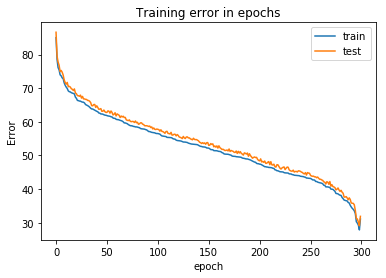

In [0]:
plt.plot(train_err)
plt.plot(test_err)
plt.title('Training error in epochs')
plt.ylabel('Error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [0]:
del_col = []
for i in data_cat.filter(regex='task').columns:
    if data_cat[i].isnull().sum() == 0:
        del_col.append(i)

In [0]:
def mle(row):
    res = np.zeros(row.shape[0])
    res[np.argmax(row)] = 1
    return res


col_classes = [data_final[c].nunique(dropna=True) for c in data_final.columns]

dummy_df = pd.get_dummies(data_final)

mle_complete = None

for i, cnt in enumerate(col_classes):
    start_idx = int(sum(col_classes[0:i]))
    col_true = dummy_df.values[:, start_idx:start_idx+cnt]
    col_completed = complete_encoded[:, start_idx:start_idx+cnt]
    print(i, start_idx)
    mle_completed = np.apply_along_axis(mle, axis=1, arr=col_completed)
    if mle_complete is None:
        mle_complete = mle_completed
    else:
        mle_complete = np.hstack([mle_complete, mle_completed])

In [0]:
#complete_encoded1 = pd.DataFrame(complete_encoded, columns = temp1.columns)
#complete_encoded1.filter(regex='numparticipants').head(5)
complete_encoded1.head(5)

,referrer,expgender,flagGroup,exprunafter,compensation,recruitment,separatedornot,sample,sunkgroup,gainlossgroup,...,moneygenderb,nativelang,nativelang2,noflagtimeestimate1,noflagtimeestimate2,noflagtimeestimate3,noflagtimeestimate4,omdimc3,race,task_url.1
0,0,1,2,1,0,5,0,0,0,1,...,1,2,0,1,2,0,1,0,15,0
1,1,1,1,1,1,5,1,1,0,1,...,0,7,0,0,0,0,0,1,17,6
2,1,1,1,1,1,5,1,1,1,0,...,1,7,0,0,0,0,0,1,16,6
3,1,1,1,1,1,5,1,1,0,1,...,0,7,0,0,0,0,0,1,16,6
4,1,1,1,1,1,5,1,1,0,1,...,0,7,0,0,0,0,0,1,19,6


In [0]:
complete_encoded1 = complete_encoded1.astype(int, errors='ignore')

In [0]:
complete_encoded1.to_csv("/content/drive/My Drive/CS536/csvfiles/complete_encoded1_cat.csv")

In [0]:
diff = complete_encoded1.values != complete_encoded2.values

result = diff.flatten().sum()

In [0]:
result

254962

In [0]:
col_completed

In [0]:
data_final.shape[0]*data_final.shape[1] - sum(data_final.isna().sum())

1534046

In [0]:
mae1 = [(1 - i/100) for i in mae1]

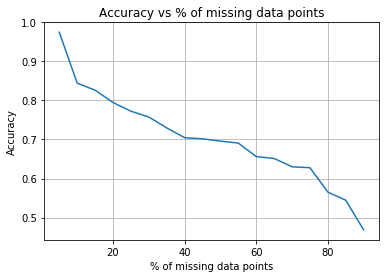

In [0]:
fig, ax = plt.subplots()
ax.plot([5 * i for i in range(1,19)], mae1)

ax.set(xlabel='% of missing data points', ylabel='Accuracy',
       title='Accuracy vs % of missing data points')
ax.grid()
plt.show()


# Classification Accuracy

In [0]:
complete_encoded1.shape

(6344, 282)

In [0]:
data_final.isna().sum()

referrer                    0
expgender                3399
flagGroup                   0
exprunafter              3365
compensation             3364
recruitment              3361
separatedornot           3398
sample                      0
sunkgroup                   0
gainlossgroup               0
gainlossDV                 73
anch1group                  0
anch2group                  0
anch3group                  0
anch4group                  0
gambfalgroup                0
scalesgroup                 0
scales                    445
scalesreca               3265
scalesrecb               3524
reciprocitygroup            0
reciprocityother           74
reciprocityus              68
allowedforbiddenGroup       0
allowedforbidden           52
quotearec                3102
quotebrec                3261
quoteGroup                  0
quote                      19
totalflagestimations     3238
                         ... 
task_url.35                 0
task_url.36                 0
task_url.3

In [0]:
#To count columns with full data
count = 0
full_cols =[]
partial_cols =[]
for i in data_final.columns:
    if data_final[i].isnull().sum() == 0:
        count += 1
        full_cols.append(i)
    else:
        partial_cols.append(i)
count

153

In [0]:
len(partial_cols)

129

In [0]:
df1 = complete_encoded1.copy()
for i in partial_cols:
    ix = [(row, col) for row in range(df1.shape[0]) for col in range(df1.shape[1])]
    for row, col in random.sample(ix, int(round(i * len(ix)))):
        df1.iat[row, col] = imputer.predict(df_x)
        

In [0]:
temp1 = data_final.isna().sum()
missing_list = [temp1[i] for i in partial_cols]    

In [0]:
acc_score

[0.9180457052797478,
 0.9078014184397163,
 0.8528991328019788,
 0.8681926127008613,
 0.8037825059101655,
 0.8978719676158374,
 0.8867948389616059,
 0.9030593430362559,
 0.8842664471811925,
 0.9148936170212766,
 0.8841607565011821,
 0.845671369844996,
 0.6603624901497241,
 0.7202521670606777,
 0.44602048857368004,
 0.7304964539007093,
 0.7320724980299448,
 0.8931237450459493,
 0.9351999477561692,
 0.8978997379681345,
 0.19070133963750985,
 0.7801418439716312,
 0.853984513668357,
 0.8457540779818922,
 0.7777777777777778,
 0.2907801418439716,
 0.524822695035461,
 0.30969267139479906,
 0.6067769897557131,
 0.35066981875492514,
 0.26792750197005516,
 0.235618597320725,
 0.30890464933018125,
 0.4428684003152088,
 0.55397951142632,
 0.582348305752561,
 0.8100866824271079,
 0.7557131599684791,
 0.8289992119779354,
 0.8486997635933806,
 0.6193853427895981,
 0.5933806146572104,
 0.628053585500394,
 0.6020488573680063,
 0.5390070921985816,
 0.5027580772261623,
 0.5200945626477541,
 0.464144996059

In [0]:
np.mean(acc_score)

0.6808306955560587

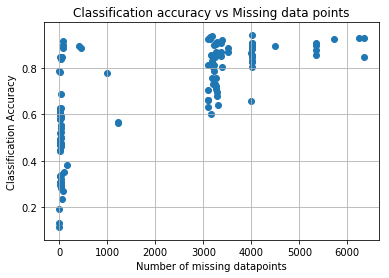

In [0]:
#ax.plot(missing_list, acc_score)
plt.scatter(missing_list, acc_score)

plt.title('Classification accuracy vs Missing data points')
plt.xlabel('Number of missing datapoints')
plt.ylabel('Classification Accuracy')
plt.grid()
plt.show()

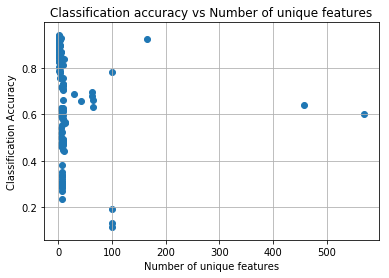

In [0]:
unique_list =[complete_encoded1[i].nunique() for i in partial_cols]
plt.scatter(unique_list, acc_score)

plt.title('Classification accuracy vs Number of unique features')
plt.xlabel('Number of unique features')
plt.ylabel('Classification Accuracy')
plt.grid()
plt.show()